### <center> Key changes in Tensorflow 2.0 </center>
- Eager execution is default in Tensorflow 2.0.
- Use of Session, placeholder and feed_dict is not required.
- Wrap python function into tensorflow function graph using `tf.function`
### <center> Hands on with TF2.0 </center>

In [2]:
# Print out multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Import modules
import tensorflow as tf
tf.executing_eagerly()
tf.__version__
tf.random.set_seed=123

True

'2.0.0-beta1'

In [33]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [4]:
# Declaring a variable
tf.Variable(10) # Scalar
tf.Variable([1,2]) # Rank1 tensor (Vector)
tf.Variable([[1,2],[3,4],[5,6]]) # Rank2 tensor (Matrix)
tf.Variable([[[1,2],[3,4]], 
             [[5,6],[7,8]]]) # Rank 3 tensor

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=int32)>

In [5]:
# Declaring constant
tf.constant(10) # Scalar
tf.constant([1,2]) # Rank1 tensor (Vector)
tf.constant([[1,2],[3,4],[5,6]]) # Rank2 tensor (Matrix)
tf.constant([[[1,2],[3,4]], 
             [[5,6],[7,8]]]) # Rank 3 tensor

<tf.Tensor: id=37, shape=(), dtype=int32, numpy=10>

<tf.Tensor: id=39, shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

<tf.Tensor: id=41, shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

<tf.Tensor: id=43, shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=int32)>

In [6]:
# Declaring ragged tensor
# Ragged tensor is a tensor with ragged dimensions (slices have different length)
ragged = tf.ragged.constant([[1,2,3], [], [4], [5,6]])
ragged
ragged[3,:]
print(tf.RaggedTensor.from_row_splits(values=[1,2,3,4,5,6,7,8,9],
                               row_splits=[0,3,3,5]))

tf.RaggedTensor(values=tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32), row_splits=tf.Tensor([0 3 3 4 6], shape=(5,), dtype=int64))

<tf.Tensor: id=73, shape=(2,), dtype=int32, numpy=array([5, 6], dtype=int32)>

<tf.RaggedTensor [[1, 2, 3], [], [4, 5]]>


#### Operations on tensorflow decalaration 

In [7]:
# Opeartions on Tensor
tensor = tf.constant([[1,2],[3,4]], dtype=tf.int64, name = 'tensor') # Declare tensor
tensor
tensor.dtype # Get tensor datatype
tensor.shape # Get shape of tensor
tf.rank(tensor).numpy() # Get rank of tensor
tf.size(tensor).numpy() # Get length/size of tensor
tensor.numpy() # Get values
tensor[1,1].numpy() # Slicing of tensor
tf.reshape(tensor, [1,4]) # Reshaping tensor - not inplace 
tensor*tensor # Primitive operations
tensor*2 # Broadcasting

<tf.Tensor: id=79, shape=(2, 2), dtype=int64, numpy=
array([[1, 2],
       [3, 4]])>

tf.int64

TensorShape([2, 2])

2

4

array([[1, 2],
       [3, 4]])

4

<tf.Tensor: id=92, shape=(1, 4), dtype=int64, numpy=array([[1, 2, 3, 4]])>

<tf.Tensor: id=94, shape=(2, 2), dtype=int64, numpy=
array([[ 1,  4],
       [ 9, 16]])>

<tf.Tensor: id=97, shape=(2, 2), dtype=int64, numpy=
array([[2, 4],
       [6, 8]])>

In [8]:
# Linalg/Matrix operations
tf.linalg.eye(2) # Create identity matrix

# Matrix operations can be performed on 2D array not on vector or 1D array.
u = tf.constant([[4.,5.,6.]])
v = tf.constant([[1.,2.,3.]])

# [4, 5, 6] * [1,    = 4*1 + 5*2 + 6*3
#             2,
#             3]

# we need to tranpose either of them based on required output shape
tf.transpose(v) # Transpose a matrix
tf.matmul(u,tf.transpose(v)) # Matrix multiplication
tf.zeros([3,2]) # Create zero tensor
tf.zeros_like(v) # Create zero tensor similar to other tensor

<tf.Tensor: id=102, shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

<tf.Tensor: id=107, shape=(3, 1), dtype=float32, numpy=
array([[1.],
       [2.],
       [3.]], dtype=float32)>

<tf.Tensor: id=111, shape=(1, 1), dtype=float32, numpy=array([[32.]], dtype=float32)>

<tf.Tensor: id=115, shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

<tf.Tensor: id=117, shape=(1, 3), dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>

In [5]:
# Most of operations on tensorflow support float instead of int,
"Operations on values"
tf.abs(tf.constant(2.56))
tf.floor(tf.constant(2.56))

t = tf.constant([[2.,3.,1.], [5.,7.,6.]])
t
tf.squeeze(t) # Reduces dimension if extra present
tf.cast(t, dtype=tf.float64) # Change datatype
tf.square(t)

tf.add(t, tf.constant([5.]))
tf.subtract(t, tf.constant(5.))

tf.one_hot([1,2,3], depth=10)

'Operations on values'

<tf.Tensor: id=1, shape=(), dtype=float32, numpy=2.56>

<tf.Tensor: id=4, shape=(), dtype=float32, numpy=2.0>

<tf.Tensor: id=6, shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 1.],
       [5., 7., 6.]], dtype=float32)>

<tf.Tensor: id=8, shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 1.],
       [5., 7., 6.]], dtype=float32)>

<tf.Tensor: id=10, shape=(2, 3), dtype=float64, numpy=
array([[2., 3., 1.],
       [5., 7., 6.]])>

<tf.Tensor: id=12, shape=(2, 3), dtype=float32, numpy=
array([[ 4.,  9.,  1.],
       [25., 49., 36.]], dtype=float32)>

<tf.Tensor: id=15, shape=(2, 3), dtype=float32, numpy=
array([[ 7.,  8.,  6.],
       [10., 12., 11.]], dtype=float32)>

<tf.Tensor: id=18, shape=(2, 3), dtype=float32, numpy=
array([[-3., -2., -4.],
       [ 0.,  2.,  1.]], dtype=float32)>

<tf.Tensor: id=24, shape=(3, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [14]:
"Indices operations"
t
tf.argmax(t, axis=1) # Return index of maximum value in tensor based on row(axis=0) and column(axis=1)
tf.argmin(t, axis=1) # Return index of minimum value in tensor
tf.argsort(t, axis=1) # Return indexes of sorted values

tf.nn.top_k(t, k=2)[0] # get top 2 values
tf.nn.top_k(t)[1] # get indices of top value
tf.nn.top_k(t).indices # get indices of top value

'Indices operations'

<tf.Tensor: id=6, shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 1.],
       [5., 7., 6.]], dtype=float32)>

<tf.Tensor: id=230, shape=(2,), dtype=int64, numpy=array([1, 1])>

<tf.Tensor: id=233, shape=(2,), dtype=int64, numpy=array([2, 0])>

<tf.Tensor: id=245, shape=(2, 3), dtype=int32, numpy=
array([[2, 0, 1],
       [0, 2, 1]], dtype=int32)>

<tf.Tensor: id=248, shape=(2, 2), dtype=float32, numpy=
array([[3., 2.],
       [7., 6.]], dtype=float32)>

<tf.Tensor: id=253, shape=(2, 1), dtype=int32, numpy=
array([[1],
       [1]], dtype=int32)>

<tf.Tensor: id=257, shape=(2, 1), dtype=int32, numpy=
array([[1],
       [1]], dtype=int32)>

'Statistical operations'

<tf.Tensor: id=416, shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [6.]], dtype=float32)>

<tf.Tensor: id=419, shape=(2, 1), dtype=float32, numpy=
array([[3.],
       [7.]], dtype=float32)>

<tf.Tensor: id=422, shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [5.]], dtype=float32)>

<tf.Tensor: id=425, shape=(2, 1), dtype=float32, numpy=
array([[ 6.],
       [18.]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(1000,) dtype=float64, numpy=
array([ 1.14289987e+00,  3.17354653e+00,  1.67275821e+00,  2.40328995e+00,
        1.91893927e+00,  4.37986604e+00,  3.49056945e+00,  3.99959811e+00,
        1.62390995e+00,  6.74471776e-01,  5.47104908e-01,  1.77190071e+00,
        4.81211063e+00,  5.51920649e+00,  3.47775547e+00,  2.33361537e+00,
       -3.70741395e+00,  6.26450169e+00,  3.75774898e-02, -2.00391820e+00,
        5.85485003e-01,  5.48264263e+00,  4.86293237e+00,  2.10178594e+00,
        5.98179331e+00,  4.45894429e+00,  1.25486441e+00,  2.62786408e+00,
        3.24149301e+00, -7.94401214e-01,  4.31749600e+00,  1.42625259e+00,
        4.64387291e+00,  1.78429617e+00,  1.60024730e+00,  8.38005551e-01,
        1.12675377e+00,  4.03842138e+00,  2.19776737e+00,  4.40050093e+00,
        4.09114021e+00, -2.96864779e-01,  4.56025313e+00,  6.60892285e+00,
        1.37730018e+00,  4.28551541e+00,  2.51041058e+00,  2.97791547e+00,
        6.35914978e+00,  1.27033913e+0

(array([ 2.,  0.,  1.,  2.,  4.,  1.,  7.,  4.,  7.,  5.,  2., 16., 15.,
        16., 28., 28., 25., 26., 34., 37., 44., 46., 49., 45., 46., 38.,
        41., 55., 43., 42., 33., 38., 35., 29., 30., 26., 20., 14.,  7.,
        16., 11.,  9.,  7.,  3.,  6.,  2.,  1.,  1.,  2.,  1.]),
 array([-3.70741395, -3.46275223, -3.21809051, -2.9734288 , -2.72876708,
        -2.48410536, -2.23944364, -1.99478192, -1.7501202 , -1.50545849,
        -1.26079677, -1.01613505, -0.77147333, -0.52681161, -0.28214989,
        -0.03748818,  0.20717354,  0.45183526,  0.69649698,  0.9411587 ,
         1.18582042,  1.43048213,  1.67514385,  1.91980557,  2.16446729,
         2.40912901,  2.65379073,  2.89845244,  3.14311416,  3.38777588,
         3.6324376 ,  3.87709932,  4.12176104,  4.36642275,  4.61108447,
         4.85574619,  5.10040791,  5.34506963,  5.58973135,  5.83439307,
         6.07905478,  6.3237165 ,  6.56837822,  6.81303994,  7.05770166,
         7.30236338,  7.54702509,  7.79168681,  8.03634853,

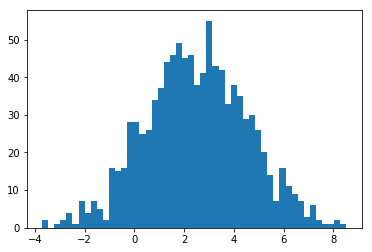

(array([23., 20., 13., 18., 20., 22., 18., 25., 20., 11., 19., 18., 19.,
        18., 11., 23., 18., 28., 27., 17., 18., 21., 23., 19., 20., 25.,
        24., 25., 14., 19., 26., 30., 21., 20., 19., 24., 24., 12., 23.,
        16., 24., 16., 17., 16., 15., 18., 12., 28., 23., 20.]),
 array([0.02294463, 0.22241766, 0.42189069, 0.62136371, 0.82083674,
        1.02030977, 1.21978279, 1.41925582, 1.61872885, 1.81820187,
        2.0176749 , 2.21714793, 2.41662095, 2.61609398, 2.81556701,
        3.01504003, 3.21451306, 3.41398609, 3.61345911, 3.81293214,
        4.01240516, 4.21187819, 4.41135122, 4.61082424, 4.81029727,
        5.0097703 , 5.20924332, 5.40871635, 5.60818938, 5.8076624 ,
        6.00713543, 6.20660846, 6.40608148, 6.60555451, 6.80502754,
        7.00450056, 7.20397359, 7.40344662, 7.60291964, 7.80239267,
        8.0018657 , 8.20133872, 8.40081175, 8.60028478, 8.7997578 ,
        8.99923083, 9.19870386, 9.39817688, 9.59764991, 9.79712294,
        9.99659596]),
 <a list of 50

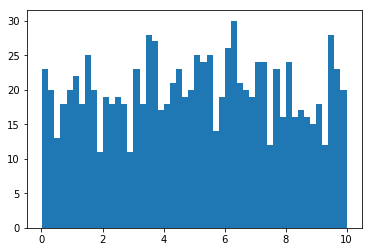

(array([10.,  5.,  6.,  7., 10.,  8., 14., 12., 15., 19., 16., 17., 18.,
        24., 27., 26., 30., 32., 23., 34., 34., 22., 30., 42., 38., 25.,
        21., 26., 30., 38., 34., 32., 23., 24., 33., 24., 19., 22., 22.,
        18., 16.,  9., 12.,  7., 10., 12.,  6.,  7.,  7.,  4.]),
 array([-1.4518375 , -1.293559  , -1.1352805 , -0.97700197, -0.81872344,
        -0.66044486, -0.50216633, -0.3438878 , -0.18560928, -0.02733075,
         0.13094778,  0.28922632,  0.44750485,  0.6057834 ,  0.7640619 ,
         0.92234045,  1.080619  ,  1.2388976 ,  1.397176  ,  1.5554546 ,
         1.7137331 ,  1.8720117 ,  2.0302901 ,  2.1885686 ,  2.3468473 ,
         2.5051258 ,  2.6634042 ,  2.821683  ,  2.9799614 ,  3.1382399 ,
         3.2965183 ,  3.454797  ,  3.6130755 ,  3.771354  ,  3.9296327 ,
         4.087911  ,  4.2461896 ,  4.404468  ,  4.5627465 ,  4.721025  ,
         4.879304  ,  5.0375824 ,  5.195861  ,  5.3541393 ,  5.512418  ,
         5.6706963 ,  5.8289747 ,  5.9872537 ,  6.145532  ,

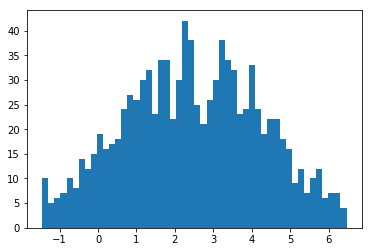

In [19]:
"Statistical operations"
tf.reduce_mean(t,axis=1, keepdims=True)
tf.reduce_max(t,axis=1, keepdims=True)
tf.reduce_min(t,axis=1, keepdims=True)
tf.reduce_sum(t,axis=1, keepdims=True)
random_distribution = tf.Variable(tf.random.normal([1000], mean=2.5, stddev=2, dtype=tf.float64))
random_distribution
plt.hist(random_distribution.numpy(), bins=50)
plt.show()
uniform_distribution = tf.Variable(tf.random.uniform([1000,1], minval=0, maxval=10, dtype=tf.float64))
plt.hist(uniform_distribution.numpy(), bins=50)
plt.show()
plt.hist(tf.random.truncated_normal([1000], mean=2.5, stddev=2), bins=50)
plt.show()

In [28]:
dice1 = tf.Variable(tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32))
dice =  tf.Variable(tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32))
dice_sum = dice1 + dice2
 
# We've got three separate 10x1 matrices. To produce a single
# 10x3 matrix, we'll concatenate them along dimension 1.
tf.concat(values=[dice1, dice2, dice_sum], axis=1)

<tf.Tensor: id=752, shape=(10, 3), dtype=int32, numpy=
array([[ 1,  4,  5],
       [ 1,  2,  3],
       [ 4,  4,  8],
       [ 5,  3,  8],
       [ 5,  5, 10],
       [ 1,  6,  7],
       [ 1,  6,  7],
       [ 4,  1,  5],
       [ 2,  2,  4],
       [ 4,  3,  7]], dtype=int32)>

In [56]:
"Mathematical operations"
tf.math.sqrt(tf.constant(49.))
tf.math.floor(tf.constant(2.756))
tf.math.ceil(tf.constant(2.456))
tf.math.squared_difference(t, tf.constant(5.))
tf.math.cumsum(t, axis=1)

'Mathematical operations'

<tf.Tensor: id=1974, shape=(), dtype=float32, numpy=7.0>

<tf.Tensor: id=1977, shape=(), dtype=float32, numpy=2.0>

<tf.Tensor: id=1980, shape=(), dtype=float32, numpy=3.0>

<tf.Tensor: id=1983, shape=(2, 3), dtype=float32, numpy=
array([[ 9.,  4., 16.],
       [ 0.,  4.,  1.]], dtype=float32)>

<tf.Tensor: id=1986, shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  5.,  6.],
       [ 5., 12., 18.]], dtype=float32)>

'Trignometric operations'

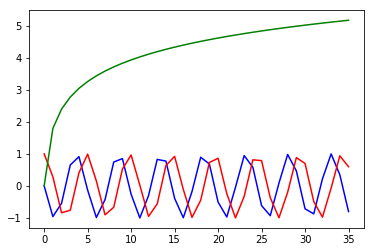

In [57]:
"Trignometric operations"
plt.plot(tf.math.sin(tf.range(0,180,5, dtype=tf.float32)),'b')
plt.plot(tf.math.cos(tf.range(0,180,5, dtype=tf.float32)),'r')
plt.plot(tf.math.log1p(tf.range(0,180,5, dtype=tf.float32)),'g')


In [30]:
# Saving and restoring tensor values using checkpoint
variable = tf.Variable([[1,3,4,5], [1,2,3,4]])
checkpoint = tf.train.Checkpoint(var=variable)
save_path = checkpoint.save('./output/01/vars')
variable.assign([[0,0,0,0],[1,2,2,0]])
variable
checkpoint.restore(save_path)
variable

<tf.Variable 'UnreadVariable' shape=(2, 4) dtype=int32, numpy=
array([[0, 0, 0, 0],
       [1, 2, 2, 0]], dtype=int32)>

<tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[0, 0, 0, 0],
       [1, 2, 2, 0]], dtype=int32)>

<tf.Variable 'Variable:0' shape=(2, 4) dtype=int32, numpy=
array([[1, 3, 4, 5],
       [1, 2, 3, 4]], dtype=int32)>

#### Using tf.function 

In [27]:
# tf.function take Python function and return a Tensorflow graph 
# to apply optimization and parallelism.
def f1(x, y):
    return tf.reduce_mean(input_tensor=tf.multiply(x ** 2, 5) + y**2)

f2 = tf.function(f1)

@tf.function
def f3(x, y):
    return tf.reduce_mean(input_tensor=tf.multiply(x ** 2, 5) + y**2)

x = tf.constant([4., -5.])
y = tf.constant([2., 3.])

# f1 and f2 return the same value, but f2 executes as a TensorFlow graph

assert f1(x,y).numpy() == f2(x,y).numpy() ==f3(x,y).numpy()